## Mownit laboratorium 2
### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji 0.14 : https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [4,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 4.0     │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [2]:
typeof(df1[:Col2])

Array{Float64,1}

In [3]:
typeof(df1[:Col3])

Array{Bool,1}

In [4]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [5]:
# ilosc wierszy
size(df2, 1) 

10

In [6]:
#ilosc kolumn
size(df2, 2) 

3

In [7]:
# można odwoływać się po indeksie
show(df2[2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [8]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [9]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [10]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [11]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793 
 1.4142135623730951

In [12]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [13]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [14]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [15]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [16]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [17]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,MojaKolumna,5.5,1,5.5,10,,,Int64
2,Col2,2.71116,1.41421,3.0,4.0,,,Float64
3,Col3,0.6,false,1.0,true,,,Bool


In [18]:
using Statistics
mean(df2[:Col2])

2.711161243192578

In [19]:
var(df2[:Col2])

0.9150284373648316

In [21]:
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [22]:
typeof(mydata)

DataFrame

In [23]:
size(mydata)

(1599, 12)

In [25]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
#https://juliadata.github.io/DataFrames.jl/stable/man/split_apply_combine.html
# przyklad: zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, df->size(df,1))

,quality,x1
,Int64⍰,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [27]:
#zaawansowane dzialanie na podgrupach
df2=by(mydata, [:quality, :alcohol]) do mySubGroup
          DataFrame(size = size(mySubGroup,1))
        end
sort(df2, [:quality, :alcohol])

,quality,alcohol,size
,Int64⍰,Float64⍰,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [28]:
# zapis do pliku
# https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html#Importing-and-Exporting-Data-(I/O)-1
CSV.write("dataframe1.csv", mydata)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest dodatkowy pakiet do pakietu Plots 

```julia
Pkg.add("StatPlots")
```
https://github.com/JuliaPlots/StatPlots.jl

Niestety Juliabox (chwilowo) nie pozwala na zainstalowanie dowolnych pakietow.

In [29]:
using DataFrames
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10), d=rand(10), e=map(x->x%2,(1:10)))


,a,b,c,d,e
,Int64,Float64,Float64,Float64,Int64
1,1,9.09694,1.41274,0.834013,1
2,2,0.503242,4.6139,0.716248,0
3,3,2.49231,9.00177,0.221035,1
4,4,6.13551,4.08142,0.376054,0
5,5,9.23738,5.26592,0.0541886,1
6,6,0.936259,3.34763,0.0807954,0
7,7,1.0992,6.26889,0.597566,1
8,8,4.68632,8.64845,0.656912,0
9,9,7.75238,3.87635,0.0201139,1


In [1]:
# zamiast makra @df z pakietu StatPlots mozna odwolywac sie bezposrednio do kolumn (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
using Plots
scatter(df[:a], [df[:b], df[:c]], colour = [:red :blue], yerr=df[:d])


UndefVarError: UndefVarError: df not defined

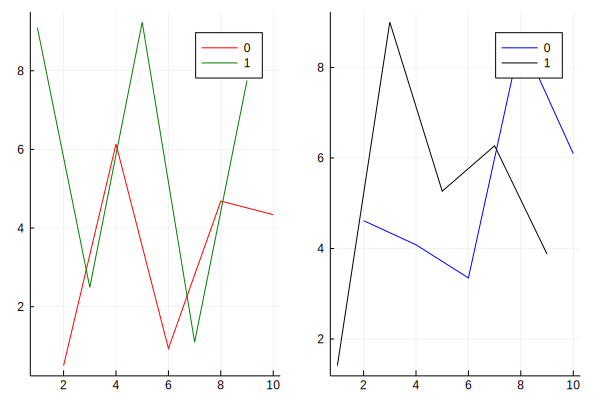

In [31]:
plot(df[:a], [df[:b], df[:c]], group=df[:e], colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.

In [7]:
import Pkg

Pkg.add("DataFrames")

Pkg.add("StatPlots")
using DataFrames
using CSV
using Statistics
using Plots


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 % [========>                                ]  18.7 %Fetching: [=========>                               ]  21.4 %>                          ]  34.4 %>                   ]  51.8 %>           ]  71.7 %==================================>      ]  84.8 %Fetching: [==================================>      ]  85.0 %>]  98.0 % Resolving package versions...
 Installed IteratorInterfaceExtensions ─ v0.1.1
 Installed TableTraits ───────────────── v0.4.0
 Installed Tables ────────────────────── v0.1.10
 Installed BinaryProvider ────────────── v0.5.2
 Installed TranscodingStreams ────────── v0.8.1
 Installed CategoricalArrays ─────────── v0.4.0
 Installed DataFrames ────────────────── v0.14.1
 Installed GR ────────────────────────── v0.35.0
 Installed MbedTLS ───────────────────── v0.6.4
 Installed CodecZlib ─────

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1189
┌ Warning: Module Compat with build ID 6860655562079 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:944
┌ Info: Precompiling CategoricalArrays [324d7699-5711-5eae-9e2f-1d82baa6b597]
└ @ Base loading.jl:1189
┌ Warning: Module Compat with build ID 6860655562079 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:944
┌ Info: Precompiling DataStreams [9a8bc11e-79be-5b39-94d7-1ccc349a1a85]
└ @ Base loading.jl:1189
┌ Info: Precompiling CodecZlib [944b1d66-785c-5afd-91f1-9de20f533193]
└ @ Base loading.jl:1189
┌ Info: Precompiling Tables [bd369af6-aec1-5ad0-b16a-f7cc5008161c]
└ @ Base loading.jl:1189
┌ Info: Precompiling TableTraits [3783bdb8-

ArgumentError: ArgumentError: Package CSV not found in current path:
- Run `import Pkg; Pkg.add("CSV")` to install the CSV package.
